In [ ]:
!pip install keras

In [ ]:
!pip install tf2onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.7/454.7 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 55.5 MB/s eta 0:00:00


In [ ]:
!pip install mlxtend

In [ ]:
!pip install onnxmltools

In [ ]:
!pip install onnxruntime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.2 MB/s eta 0:00:00


In [ ]:
import tensorflow
import cv2,os
import seaborn as sns
import numpy as np
import tensorflow as tf
import tf2onnx
import onnxruntime as ort
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import xgboost as xgb
import onnxmltools
from skl2onnx.common.data_types import FloatTensorType
from mlxtend.plotting import heatmap
from torch.utils.data import TensorDataset, DataLoader


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/ML Project

/content/drive/MyDrive/Colab Notebooks/ML Project


In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
print(tensorflow.__version__)

2.15.0


Data Preprocessing

In [ ]:

data_path='/content/drive/MyDrive/Colab Notebooks/ML Project/Dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)


{'cat': 0, 'dog': 1}
['cat', 'dog']
[0, 1]


In [ ]:
img_size=100
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)

    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            resized=cv2.resize(img,(img_size,img_size))
            #resizing the image  into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [ ]:
data

[array([[[122, 138, 155],
         [128, 144, 161],
         [124, 140, 157],
         ...,
         [119, 135, 148],
         [116, 131, 147],
         [111, 126, 142]],
 
        [[137, 153, 170],
         [145, 161, 178],
         [155, 171, 187],
         ...,
         [119, 135, 148],
         [116, 131, 147],
         [111, 126, 142]],
 
        [[146, 162, 179],
         [152, 168, 185],
         [162, 178, 191],
         ...,
         [119, 135, 148],
         [116, 131, 147],
         [111, 126, 142]],
 
        ...,
 
        [[ 59, 104, 138],
         [ 81, 126, 160],
         [ 83, 126, 159],
         ...,
         [185, 188, 192],
         [173, 179, 188],
         [167, 176, 189]],
 
        [[ 72, 115, 148],
         [104, 148, 181],
         [100, 144, 177],
         ...,
         [179, 184, 191],
         [140, 149, 159],
         [166, 177, 191]],
 
        [[ 72, 117, 154],
         [ 67, 117, 153],
         [ 64, 112, 148],
         ...,
         [104, 123, 143],
  

In [ ]:
target

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


Recale and assign catagorical lables

In [ ]:

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,3))
target=np.array(target)
new_target=to_categorical(target)

In [ ]:
new_target

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
new_target.shape

(557, 2)

CNN Model

In [ ]:
data.shape

(557, 100, 100, 3)

In [ ]:
data.shape[1:]

(100, 100, 3)

In [ ]:

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 98, 98, 200)       5600      
                                                                 
 activation_4 (Activation)   (None, 98, 98, 200)       0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 49, 49, 200)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 47, 47, 100)       180100    
                                                                 
 activation_5 (Activation)   (None, 47, 47, 100)       0         
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 23, 23, 100)       0         
 g2D)                                                 

Splittiong data into traning and testing

In [ ]:
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.1)

In [ ]:
train_data.shape

(501, 100, 100, 3)

In [ ]:
train_target.shape

(501, 2)

In [ ]:
#checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 [==============================] - 31s 2s/step - loss: 0.7945 - accuracy: 0.5075 - val_loss: 0.6989 - val_accuracy: 0.4554
Epoch 2/200
13/13 [==============================] - 28s 2s/step - loss: 0.6982 - accuracy: 0.5450 - val_loss: 0.6916 - val_accuracy: 0.5248
Epoch 3/200
13/13 [==============================] - 26s 2s/step - loss: 0.6941 - accuracy: 0.5000 - val_loss: 0.6927 - val_accuracy: 0.5149
Epoch 4/200
13/13 [==============================] - 28s 2s/step - loss: 0.6938 - accuracy: 0.4875 - val_loss: 0.6921 - val_accuracy: 0.5149
Epoch 5/200
13/13 [==============================] - 27s 2s/step - loss: 0.6775 - accuracy: 0.6000 - val_loss: 0.6882 - val_accuracy: 0.5446
Epoch 6/200
13/13 [==============================] - 26s 2s/step - loss: 0.6569 - accuracy: 0.5850 - val_loss: 0.7067 - val_accuracy: 0.5941
Epoch 7/200
13/13 [==============================] - 27s 2s/step - loss: 0.5951 - accuracy: 0.6800 - val_loss: 0.7327 - val_accuracy: 0.6040
Epoch 8/200
1

In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


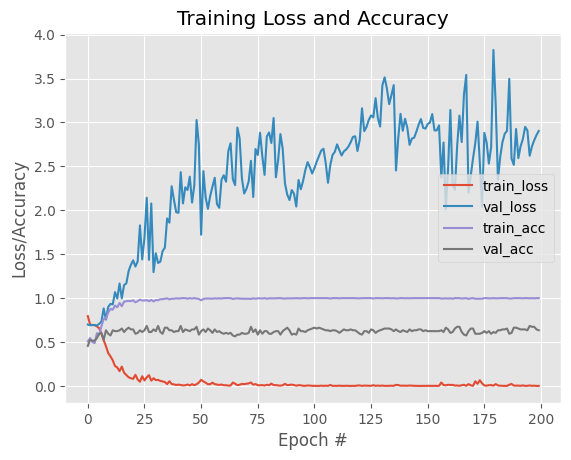

In [ ]:
# plot the training loss and accuracy
N = 200
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")


2/2 [==============================] - 2s 761ms/step
Accuracy: 0.625
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.54      0.59        28
           1       0.61      0.71      0.66        28

    accuracy                           0.62        56
   macro avg       0.63      0.62      0.62        56
weighted avg       0.63      0.62      0.62        56



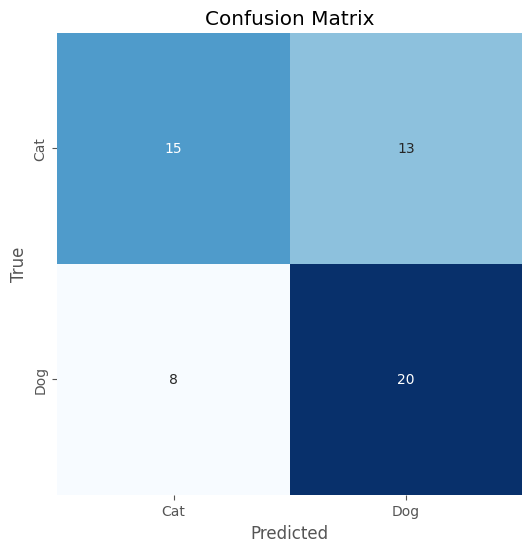

In [ ]:
# Make predictions on the test set
predictions = model.predict(test_data)

# Convert one-hot encoded predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded true labels to class labels
true_labels = np.argmax(test_target, axis=1)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy: {accuracy}')

# Display classification report
print('Classification Report:')
print(classification_report(true_labels, predicted_labels))

# Display confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
import tf2onnx
# Convert the Keras model to ONNX
onnx_model, _ = tf2onnx.convert.from_keras(model)
tf2onnx.save_model(onnx_model, 'model.onnx')

In [ ]:

# Load your TensorFlow model
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/ML Project/model.h5')

# Convert the model to ONNX
onnx_model, _ = tf2onnx.convert.from_keras(
    model,
    opset=12,  # Set opset version to 12 or the version you need
    input_signature=[tf.TensorSpec(shape=None, dtype=tf.float32)]  # Specify input signature
)

# Save the ONNX model
with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())



In [ ]:


def load_model(model_path):
    session = ort.InferenceSession(model_path)
    return session

def preprocess_image(image_path, img_size=100):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (img_size, img_size))
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)
    return img

def predict(image_path, model_session):
    input_name = model_session.get_inputs()[0].name
    image = preprocess_image(image_path)
    predictions = model_session.run(None, {input_name: image})[0]
    predicted_class = np.argmax(predictions, axis=1)
    return predicted_class

# Load the model
onnx_model = load_model('path_to_onnx_model/model.onnx')

# Predict an image
image_path = '/content/dog_37.jpg.jpg' # Path to the image you want to classify
prediction = predict(image_path, onnx_model)
print("Predicted class:", 'Cat' if prediction[0] == 0 else 'Dog')


In [ ]:
python -m tf2onnx.convert --saved-model saved_model_directory --output model.onnx